In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [46]:
corpus = ['GloVe, coined from Global Vectors, is a model for distributed word representation. The model is an unsupervised learning algorithm for obtaining vector representations for words. This is achieved by mapping words into a meaningful space where the distance between words is related to semantic similarity.[1] Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space. It is developed as an open-source project at Stanford.[2] As log-bilinear regression model for unsupervised learning of word representations, it combines the features of two model families, namely the global matrix factorization and local context window methods.']

In [47]:
tokens = []
for i in range (len(corpus)):
    sents = corpus[i].split(".")
    for j in range(len(sents)):
        tokens = tokens + sents[j].lower().split(" ")

In [48]:
my_dict = list(set(tokens))

In [60]:
def word2idx(token):
    index = my_dict.index(token)
    return index
def idx2word(index):
    word = my_dict[index]
    return word

In [61]:
word2idx('word')

4

In [62]:
ss=len(my_dict)

In [63]:
zero_matrix=np.zeros((ss,ss))

In [ ]:
for token in tokens:
    print(token,word2idx[token])

In [71]:
CoM=np.zeros((len(my_dict),len(my_dict)))
s = len(tokens)-1
for idx in range(s):
  index2=word2idx(tokens[idx+1])
  index1 = word2idx(tokens[idx])
  print(tokens[idx],tokens[idx+1])
  CoM[index1,index2] +=1
print ('Shape of Co-occurance Matrix ', CoM.shape)

glove, coined
coined from
from global
global vectors,
vectors, is
is a
a model
model for
for distributed
distributed word
word representation
representation 
 the
the model
model is
is an
an unsupervised
unsupervised learning
learning algorithm
algorithm for
for obtaining
obtaining vector
vector representations
representations for
for words
words 
 this
this is
is achieved
achieved by
by mapping
mapping words
words into
into a
a meaningful
meaningful space
space where
where the
the distance
distance between
between words
words is
is related
related to
to semantic
semantic similarity
similarity [1]
[1] training
training is
is performed
performed on
on aggregated
aggregated global
global word-word
word-word co-occurrence
co-occurrence statistics
statistics from
from a
a corpus,
corpus, and
and the
the resulting
resulting representations
representations showcase
showcase interesting
interesting linear
linear substructures
substructures of
of the
the word
word vector
vector space
space 
 i

In [72]:
def return_matrix(random_words,dim =15):
    word_matrix = np.random.randn(len(random_words),dim)
    i = 0
    for word in random_words:
        word_matrix[i] = word2idx(word)
        i +=1
    return word_matrix

In [77]:
random_words =[  'matrix', 'the', 'local', 'distance','of', 'context', 'two', 'word', 'as', 'it']
matrix_return = return_matrix(random_words, 10)
matrix_return[:10,:10]

array([[17., 17., 17., 17., 17., 17., 17., 17., 17., 17.],
       [12., 12., 12., 12., 12., 12., 12., 12., 12., 12.],
       [43., 43., 43., 43., 43., 43., 43., 43., 43., 43.],
       [36., 36., 36., 36., 36., 36., 36., 36., 36., 36.],
       [28., 28., 28., 28., 28., 28., 28., 28., 28., 28.],
       [23., 23., 23., 23., 23., 23., 23., 23., 23., 23.],
       [41., 41., 41., 41., 41., 41., 41., 41., 41., 41.],
       [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.],
       [53., 53., 53., 53., 53., 53., 53., 53., 53., 53.],
       [11., 11., 11., 11., 11., 11., 11., 11., 11., 11.]])

In [78]:
pca_ = PCA(n_components = 2)  
data = pca_.fit_transform(matrix_return)

Text(0, 0.5, 'PCA2')

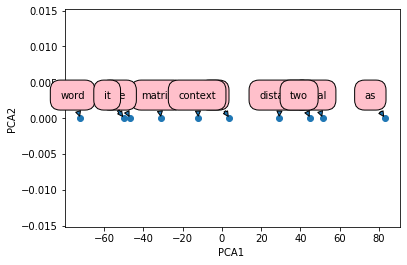

In [80]:
plt.scatter(data[:,0],data[:,1],cmap=plt.get_cmap('Spectral'))
for label,x,y in zip(random_words,data[:,0],data[:,1]):
    plt.annotate(
        label,
        xy=(x,y),
        xytext=(-20, 20),
        textcoords='offset points',
        bbox=dict(boxstyle='round,pad=1', fc='pink', alpha=1),
        arrowprops=dict(arrowstyle = 'simple', connectionstyle='arc3,rad=0')
    )
plt.xlabel('PCA1 ')
plt.ylabel('PCA2')

In [81]:
tsne = TSNE(n_components=2, verbose=1,perplexity=3,method='exact')
tsne_results = tsne.fit_transform(matrix_return)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 10 / 10
[t-SNE] Mean sigma: 22.470179
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.628173
[t-SNE] KL divergence after 1000 iterations: 0.084326


Text(0, 0.5, 'TSNE2')

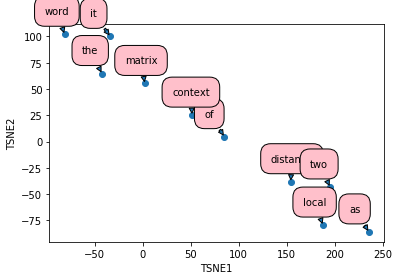

In [82]:
plt.scatter(tsne_results[:,0],tsne_results[:,1],cmap=plt.get_cmap('Spectral'))
for label,x,y in zip(random_words,tsne_results[:,0],tsne_results[:,1]):
    plt.annotate(
        label,
        xy=(x,y),
        xytext=(-20, 20),
        textcoords='offset points',
        bbox=dict(boxstyle='round,pad=1', fc='pink', alpha=1),
        arrowprops=dict(arrowstyle = 'simple', connectionstyle='arc3,rad=0')
    )
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')